/tmp/ipython-input-4260984366.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage_Male_Protagonists', y='Pelicula', data=male_protagonist_percentage_df, palette='viridis')


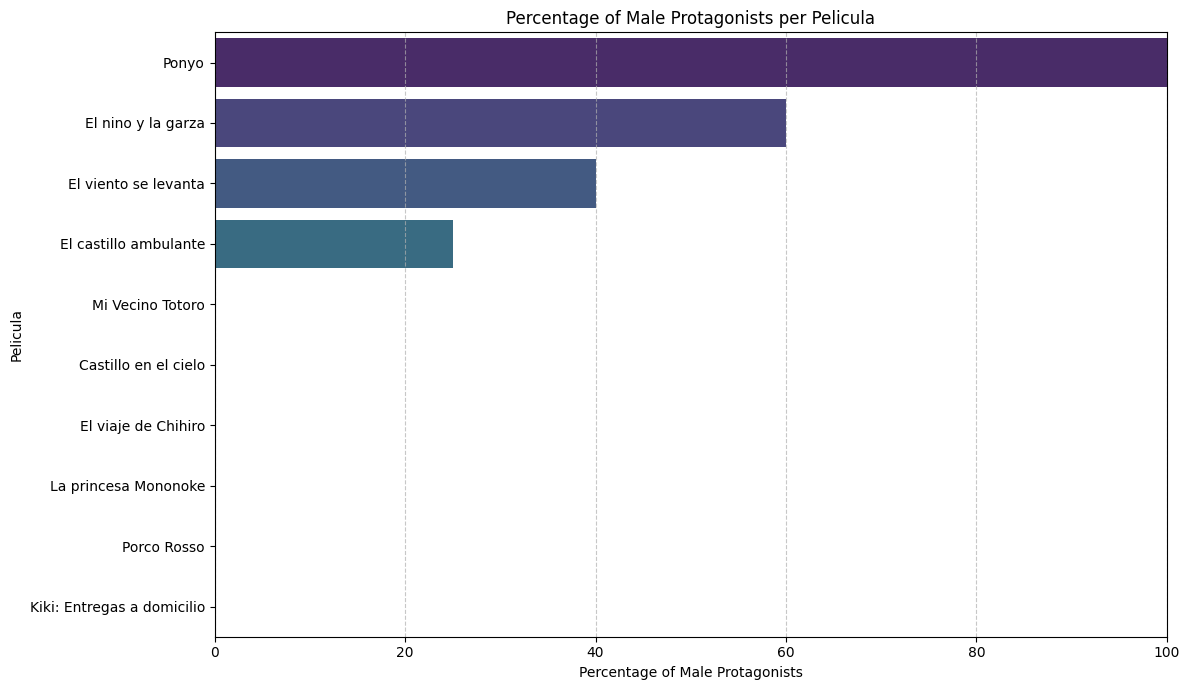

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Pelicula' and calculate the percentage of male protagonists for each movie
male_protagonist_percentage_per_movie = []

for movie in df['Pelicula'].unique():
    movie_df = df[df['Pelicula'] == movie]
    protagonists_movie_df = movie_df[movie_df['Protagonismo'] == 'Protagonista']

    male_protagonists_count_movie = protagonists_movie_df[protagonists_movie_df['Genero'] == 'Masculino'].shape[0]
    total_protagonists_count_movie = protagonists_movie_df.shape[0]

    if total_protagonists_count_movie > 0:
        percentage = (male_protagonists_count_movie / total_protagonists_count_movie) * 100
        male_protagonist_percentage_per_movie.append({'Pelicula': movie, 'Percentage_Male_Protagonists': percentage})
    else:
        male_protagonist_percentage_per_movie.append({'Pelicula': movie, 'Percentage_Male_Protagonists': 0.0}) # No protagonists in this movie

# Convert the list to a DataFrame
male_protagonist_percentage_df = pd.DataFrame(male_protagonist_percentage_per_movie)

# Sort by percentage for better visualization
male_protagonist_percentage_df = male_protagonist_percentage_df.sort_values(by='Percentage_Male_Protagonists', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Percentage_Male_Protagonists', y='Pelicula', data=male_protagonist_percentage_df, palette='viridis')
plt.xlabel('Percentage of Male Protagonists')
plt.ylabel('Pelicula')
plt.title('Percentage of Male Protagonists per Pelicula')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
from PIL import Image

png_filename = 'gender_protagonismo_stacked_bar_chart.png'
jpg_filename = 'gender_protagonismo_stacked_bar_chart.jpg'

try:
    # Open the PNG image
    img = Image.open(png_filename)

    # Convert to RGB if it's RGBA (PNGs can have an alpha channel)
    if img.mode == 'RGBA':
        img = img.convert('RGB')

    # Save as JPG
    img.save(jpg_filename, 'JPEG')
    print(f"Graph successfully converted and saved as {jpg_filename}")
except FileNotFoundError:
    print(f"Error: The file {png_filename} was not found.")
except Exception as e:
    print(f"An error occurred during conversion: {e}")


Graph successfully converted and saved as gender_protagonismo_stacked_bar_chart.jpg


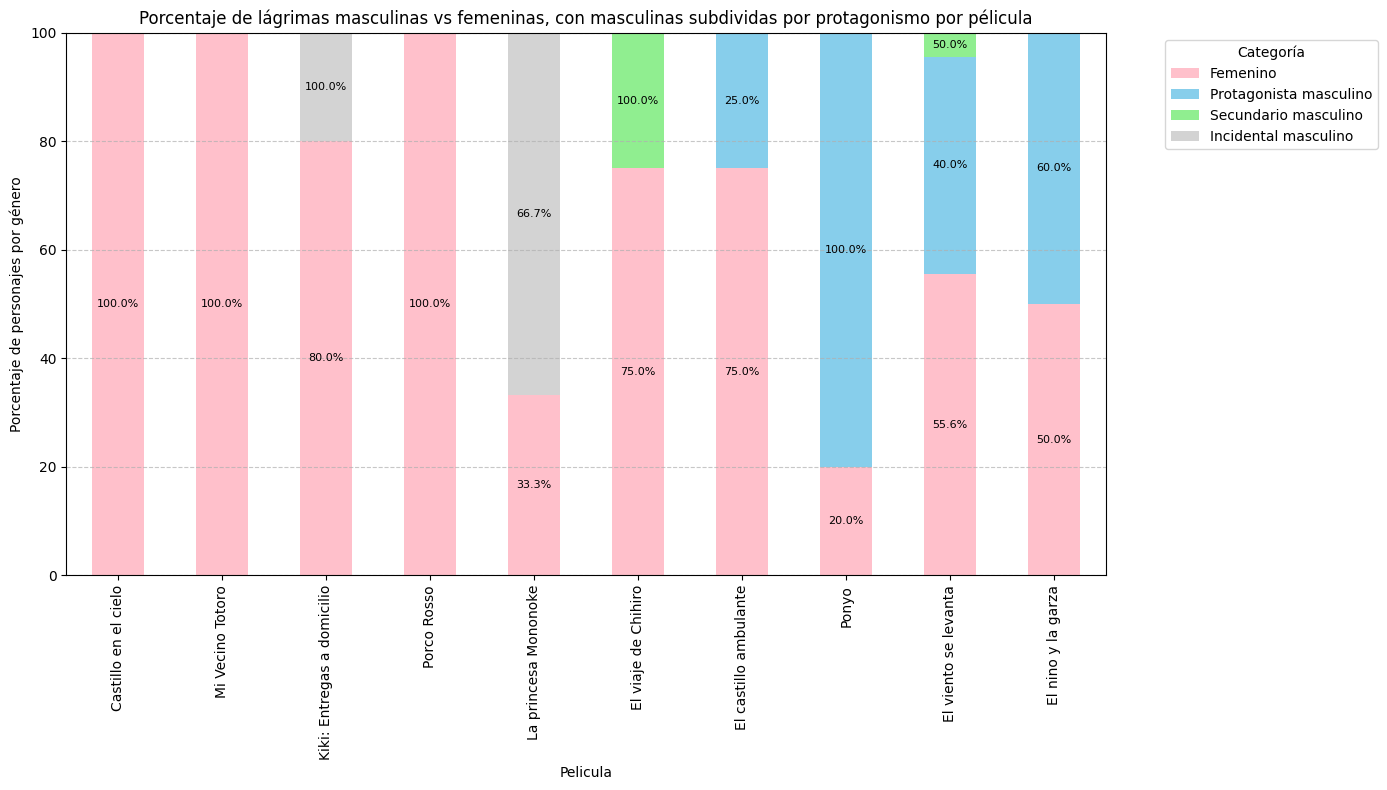

Graph saved as gender_protagonismo_stacked_bar_chart.png and embedded in gender_protagonismo_stacked_bar_chart.html


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare male data (pivot from male_percentage_by_protagonismo_df)
# 'male_percentage_by_protagonismo_df' already exists from previous steps.
male_stacked_data = male_percentage_by_protagonismo_df.pivot(
    index='Pelicula',
    columns='Protagonismo',
    values='Percentage_Male_Characters'
).fillna(0)

# 2. Prepare female data (extract from overall_female_percentage_df)
# 'overall_female_percentage_df' already exists from previous steps.
female_overall_data = overall_female_percentage_df[overall_female_percentage_df['Gender'] == 'Femenino']
female_overall_data = female_overall_data.set_index('Pelicula')['Percentage_Characters'].rename('Femenino_Overall')

# 3. Merge male and female data
combined_gender_protagonismo_df = male_stacked_data.merge(
    female_overall_data,
    left_index=True,
    right_index=True,
    how='outer'
).fillna(0) # Fill any NaN if a movie didn't have male/female characters, or specific protagonismo

# Define the custom order for movies
custom_movie_order = [
    'Castillo en el cielo',
    'Mi Vecino Totoro',
    'Kiki: Entregas a domicilio',
    'Porco Rosso',
    'La princesa Mononoke',
    'El viaje de Chihiro',
    'El castillo ambulante',
    'Ponyo',
    'El viento se levanta',
    'El nino y la garza'
]

# Apply the custom order to the 'Pelicula' index
combined_gender_protagonismo_df = combined_gender_protagonismo_df.reindex(custom_movie_order)

# Reorder columns for desired stacking order (e.g., female first, then male categories)
column_order = ['Femenino_Overall', 'Protagonista', 'Secundario', 'Incidental']
# Ensure all columns exist before reordering
column_order = [col for col in column_order if col in combined_gender_protagonismo_df.columns]
combined_gender_protagonismo_df = combined_gender_protagonismo_df[column_order]

# Rename columns for the legend
combined_gender_protagonismo_df = combined_gender_protagonismo_df.rename(columns={
    'Femenino_Overall': 'Femenino',
    'Protagonista': 'Protagonista masculino',
    'Secundario': 'Secundario masculino',
    'Incidental': 'Incidental masculino'
})

# Create the stacked bar chart
plt.figure(figsize=(14, 8))
ax = plt.gca()
combined_gender_protagonismo_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color={'Femenino': 'pink', 'Protagonista masculino': 'skyblue', 'Secundario masculino': 'lightgreen', 'Incidental masculino': 'lightgray'},
    ax=ax
)

plt.ylabel('Porcentaje de personajes por género')
plt.xlabel('Pelicula')
plt.title('Porcentaje de lágrimas masculinas vs femeninas, con masculinas subdividas por protagonismo por pélicula')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add percentage labels to the bars
for container in ax.containers:
    labels = [f'{w:.1f}%' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

# Save the plot as a PNG image
plot_filename = 'gender_protagonismo_stacked_bar_chart.png'
plt.savefig(plot_filename)
plt.show()

# Create an HTML file to embed the image
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Gender Protagonismo Stacked Bar Chart</title>
</head>
<body>
    <h1>Porcentaje de lágrimas masculinas vs femeninas, con masculinas subdividas por protagonismo por pélicula</h1>
    <img src="{plot_filename}" alt="Gender Protagonismo Stacked Bar Chart">
</body>
</html>
"""

with open('gender_protagonismo_stacked_bar_chart.html', 'w') as f:
    f.write(html_content)

print(f"Graph saved as {plot_filename} and embedded in gender_protagonismo_stacked_bar_chart.html")

<Figure size 1400x800 with 0 Axes>

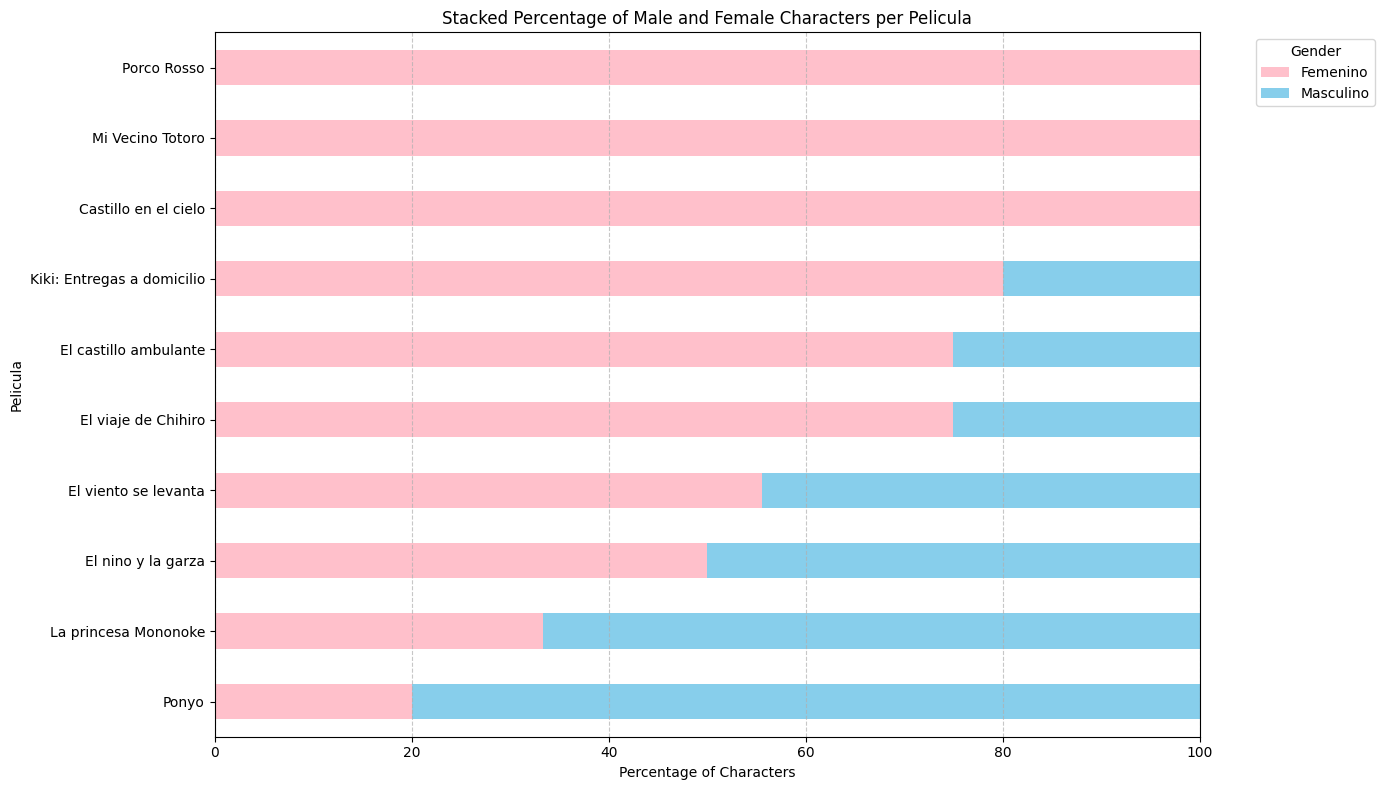

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure combined_gender_percentage_df is available from the previous step

# Pivot the DataFrame to prepare for stacking
pivoted_gender_df = combined_gender_percentage_df.pivot(index='Pelicula', columns='Gender', values='Percentage_Characters').fillna(0)

# Sort the pivoted_gender_df for better visualization
# For example, sorting by the sum of male and female percentages (which should be 100% for each movie)
# or by one of the genders to maintain a consistent order.
# Let's re-use the male_order established previously for consistency, if available.
# If not, we can sort by male percentage or total characters.
if 'male_order' in locals() or 'male_order' in globals():
    pivoted_gender_df = pivoted_gender_df.loc[male_order]
else:
    # Fallback if male_order somehow isn't available, sort by total characters or another metric
    pivoted_gender_df['Total_Characters'] = pivoted_gender_df['Masculino'] + pivoted_gender_df['Femenino']
    pivoted_gender_df = pivoted_gender_df.sort_values(by='Masculino', ascending=False).drop(columns=['Total_Characters'])

# Create the stacked bar chart
plt.figure(figsize=(14, 8))
pivoted_gender_df.plot(kind='barh', stacked=True, figsize=(14, 8), color={'Masculino': 'skyblue', 'Femenino': 'pink'})

plt.xlabel('Percentage of Characters')
plt.ylabel('Pelicula')
plt.title('Stacked Percentage of Male and Female Characters per Pelicula')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

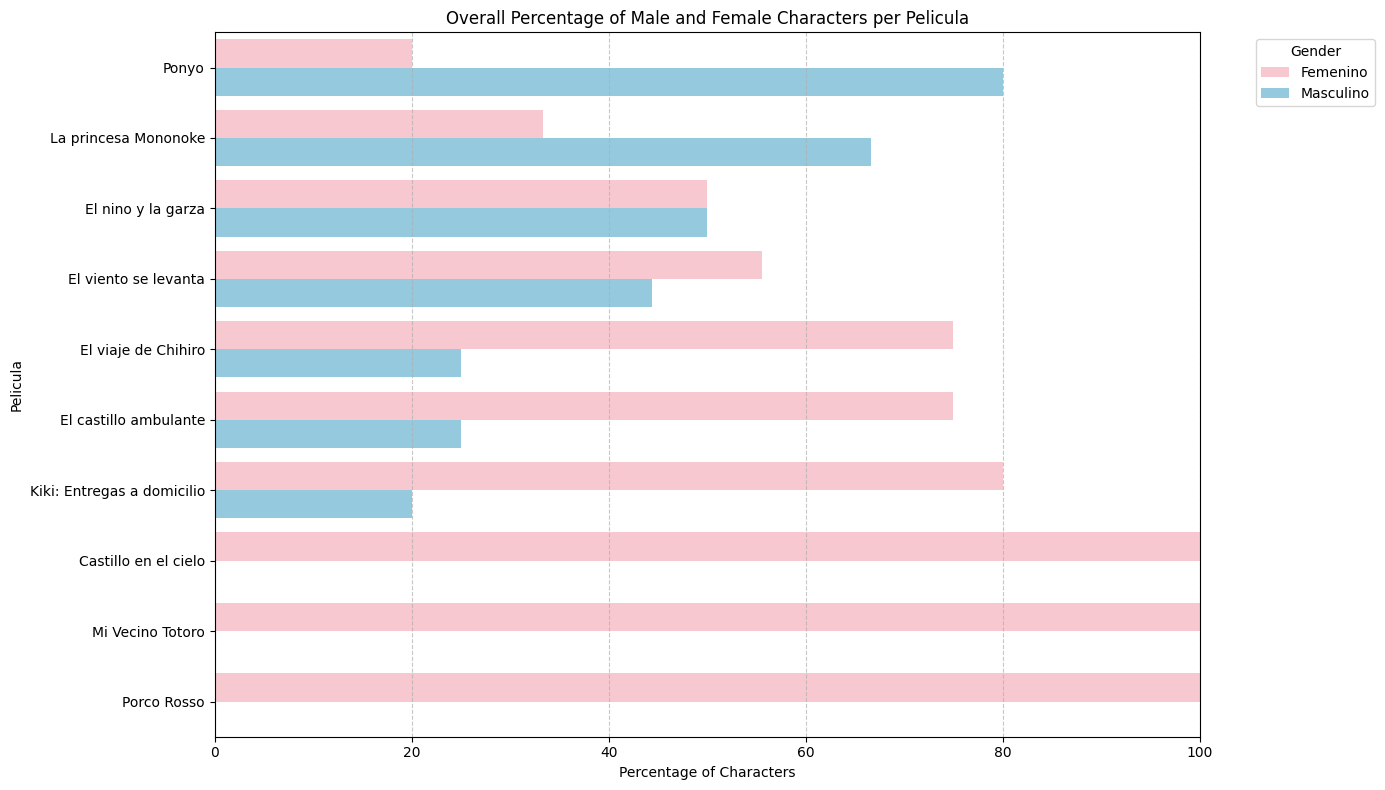

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the overall percentage of male characters for each movie (re-doing for completeness)
overall_male_percentage_per_movie = []
overall_female_percentage_per_movie = []

for movie in df['Pelicula'].unique():
    movie_df = df[df['Pelicula'] == movie]

    male_characters_count = movie_df[movie_df['Genero'] == 'Masculino'].shape[0]
    female_characters_count = movie_df[movie_df['Genero'] == 'Femenino'].shape[0]
    total_characters_count = movie_df.shape[0]

    if total_characters_count > 0:
        percentage_male = (male_characters_count / total_characters_count) * 100
        percentage_female = (female_characters_count / total_characters_count) * 100
    else:
        percentage_male = 0.0
        percentage_female = 0.0

    overall_male_percentage_per_movie.append({'Pelicula': movie, 'Gender': 'Masculino', 'Percentage_Characters': percentage_male})
    overall_female_percentage_per_movie.append({'Pelicula': movie, 'Gender': 'Femenino', 'Percentage_Characters': percentage_female})

# Convert the lists to DataFrames
overall_male_percentage_df_temp = pd.DataFrame(overall_male_percentage_per_movie)
overall_female_percentage_df = pd.DataFrame(overall_female_percentage_per_movie)

# Concatenate the two DataFrames
combined_gender_percentage_df = pd.concat([overall_male_percentage_df_temp, overall_female_percentage_df])

# Sort by movie and then by gender for consistent plotting, or by overall male percentage for an ordered view
# For consistent ordering across both genders, we'll sort by male percentage first and apply that order to both.
# Let's get the order from the male percentages (highest male first)
male_order = overall_male_percentage_df_temp.sort_values(by='Percentage_Characters', ascending=False)['Pelicula'].tolist()
combined_gender_percentage_df['Pelicula'] = pd.Categorical(combined_gender_percentage_df['Pelicula'], categories=male_order, ordered=True)
combined_gender_percentage_df = combined_gender_percentage_df.sort_values(by=['Pelicula', 'Gender'], ascending=[False, True])

# Create the grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage_Characters', y='Pelicula', hue='Gender', data=combined_gender_percentage_df, palette={'Masculino': 'skyblue', 'Femenino': 'pink'})
plt.xlabel('Percentage of Characters')
plt.ylabel('Pelicula')
plt.title('Overall Percentage of Male and Female Characters per Pelicula')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

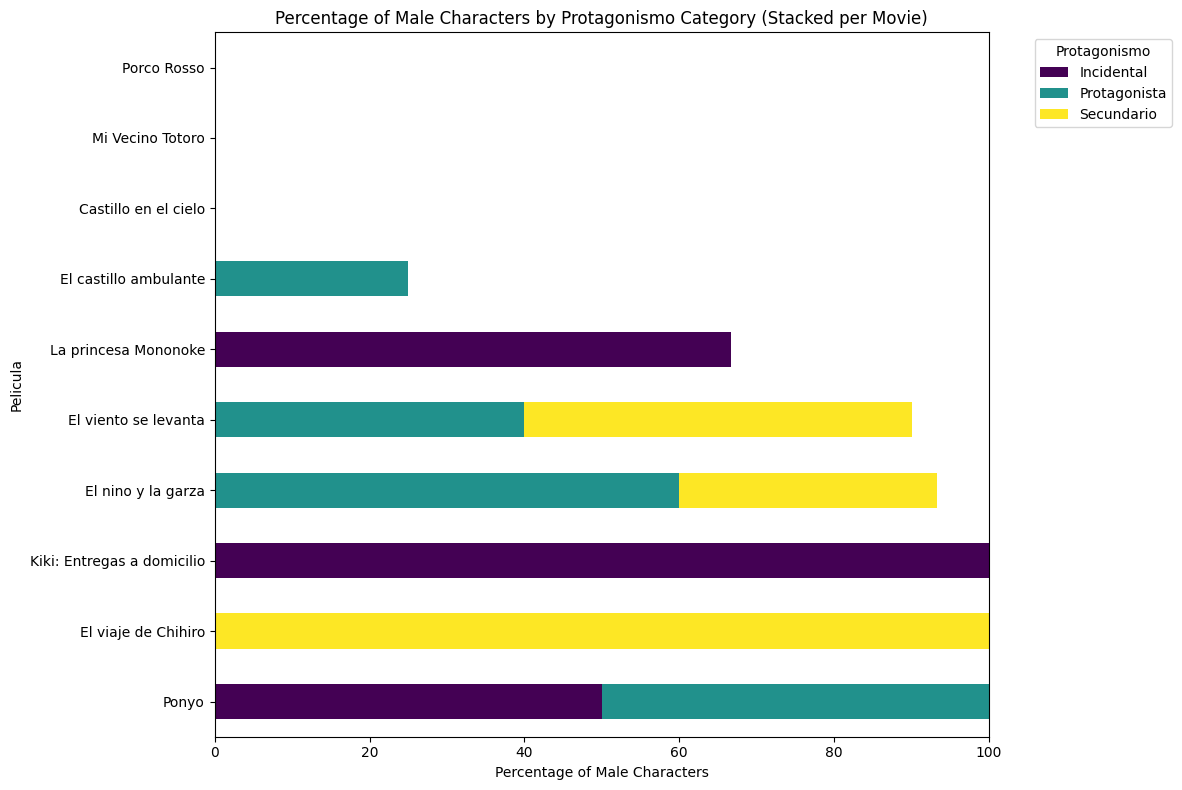

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'male_percentage_by_protagonismo_df' DataFrame is available
# (It was created in a previous step, so it should be in the kernel state)

# Pivot the DataFrame to prepare for stacking
pivoted_df = male_percentage_by_protagonismo_df.pivot(index='Pelicula', columns='Protagonismo', values='Percentage_Male_Characters').fillna(0)

# Sort the pivoted_df by the sum of percentages for better visualization, or by a specific category if desired
pivoted_df['Total_Male_Percentage'] = pivoted_df.sum(axis=1)
pivoted_df = pivoted_df.sort_values(by='Total_Male_Percentage', ascending=False).drop(columns=['Total_Male_Percentage'])

# Create the stacked bar chart
pivoted_df.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='viridis')

plt.xlabel('Percentage of Male Characters')
plt.ylabel('Pelicula')
plt.title('Percentage of Male Characters by Protagonismo Category (Stacked per Movie)')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
plt.legend(title='Protagonismo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3883994262.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall_Percentage_Male_Characters', y='Pelicula', data=overall_male_percentage_df, palette='viridis')


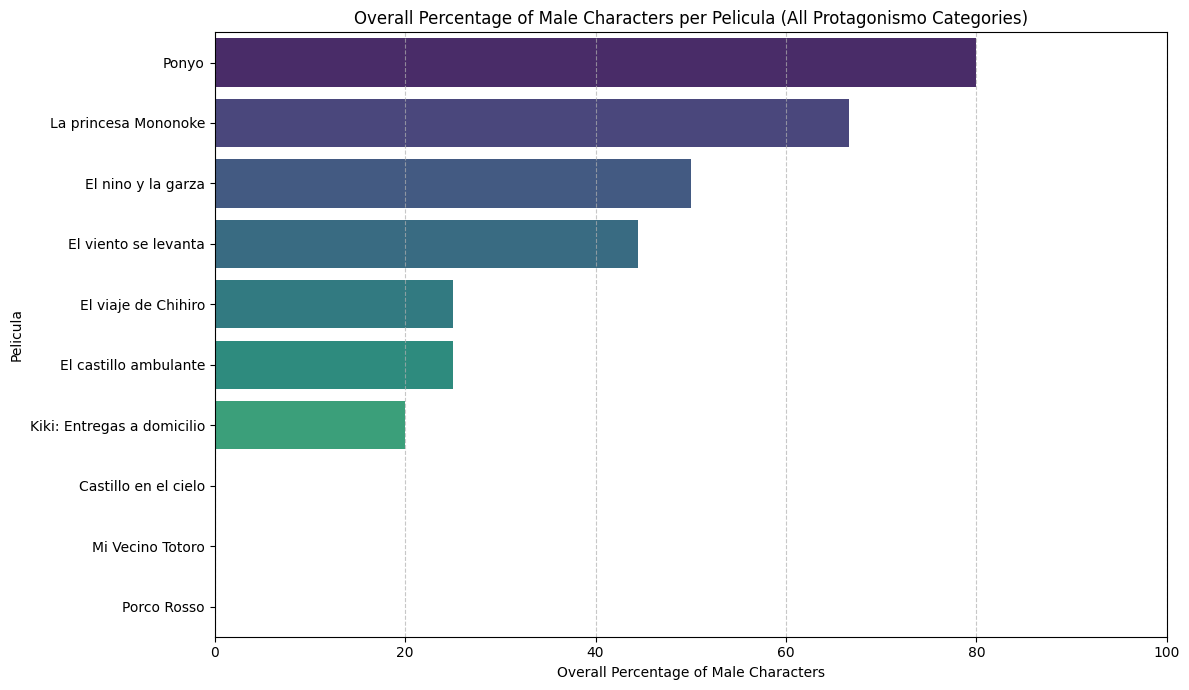

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the overall percentage of male characters for each movie
overall_male_percentage_per_movie = []

for movie in df['Pelicula'].unique():
    movie_df = df[df['Pelicula'] == movie]

    male_characters_count = movie_df[movie_df['Genero'] == 'Masculino'].shape[0]
    total_characters_count = movie_df.shape[0]

    if total_characters_count > 0:
        percentage = (male_characters_count / total_characters_count) * 100
        overall_male_percentage_per_movie.append({'Pelicula': movie, 'Overall_Percentage_Male_Characters': percentage})
    else:
        overall_male_percentage_per_movie.append({'Pelicula': movie, 'Overall_Percentage_Male_Characters': 0.0}) # No characters in this movie

# Convert the list to a DataFrame
overall_male_percentage_df = pd.DataFrame(overall_male_percentage_per_movie)

# Sort by percentage for better visualization
overall_male_percentage_df = overall_male_percentage_df.sort_values(by='Overall_Percentage_Male_Characters', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Overall_Percentage_Male_Characters', y='Pelicula', data=overall_male_percentage_df, palette='viridis')
plt.xlabel('Overall Percentage of Male Characters')
plt.ylabel('Pelicula')
plt.title('Overall Percentage of Male Characters per Pelicula (All Protagonismo Categories)')
plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
# Filter for protagonists
protagonists_df = df[df['Protagonismo'] == 'Protagonista']

# Count male protagonists
male_protagonists_count = protagonists_df[protagonists_df['Genero'] == 'Masculino'].shape[0]

# Total number of protagonists
total_protagonists_count = protagonists_df.shape[0]

# Calculate percentage
if total_protagonists_count > 0:
    percentage_male_protagonists = (male_protagonists_count / total_protagonists_count) * 100
    print(f"Percentage of male protagonists: {percentage_male_protagonists:.2f}%")
else:
    print("No protagonists found in the dataset.")

Percentage of male protagonists: 27.27%


In [5]:
print("Unique values in 'Genero' column:")
print(df['Genero'].unique())

print("\nUnique values in 'Protagonismo' column:")
print(df['Protagonismo'].unique())

Unique values in 'Genero' column:
['Femenino' 'Masculino']

Unique values in 'Protagonismo' column:
['Protagonista' 'Incidental' 'Secundario']


In [4]:
print(df.columns)

Index(['Pelicula', 'Ano', 'Timestamp', 'Duracion', 'Escena', 'Personaje',
       'Genero', 'Edad', 'Protagonismo', 'Narrativa', 'Causa', 'Emocion',
       'Reaccion social', 'Responsabilidad atribuida'],
      dtype='object')


# Task
Calculate the percentage of male characters for each 'Protagonismo' category ('Protagonista', 'Incidental', 'Secundario') within each movie. Store these percentages in a new DataFrame and then generate a grouped bar chart to visualize the male percentage for each 'Protagonismo' category, grouped by 'Pelicula'.

## Calculate Male Percentage for Each 'Protagonismo' Category per Movie

### Subtask:
Iterate through each movie and each 'Protagonismo' category ('Protagonista', 'Incidental', 'Secundario') to calculate the percentage of male characters within that specific category for that movie. The results will be stored in a new DataFrame.


**Reasoning**:
The subtask requires iterating through each movie and 'Protagonismo' category to calculate the percentage of male characters. I will write a Python code block to perform these calculations and store the results in a new DataFrame as instructed.



In [8]:
import pandas as pd

male_percentage_by_protagonismo_list = []

unique_movies = df['Pelicula'].unique()
unique_protagonismo_categories = df['Protagonismo'].unique()

for movie in unique_movies:
    for protagonismo_category in unique_protagonismo_categories:
        # Filter data for current movie and protagonismo category
        filtered_df = df[(df['Pelicula'] == movie) & (df['Protagonismo'] == protagonismo_category)]

        # Count male characters in the filtered data
        male_characters_count = filtered_df[filtered_df['Genero'] == 'Masculino'].shape[0]

        # Count total characters in the filtered data
        total_characters_count = filtered_df.shape[0]

        percentage_male_characters = 0.0
        if total_characters_count > 0:
            percentage_male_characters = (male_characters_count / total_characters_count) * 100

        male_percentage_by_protagonismo_list.append({
            'Pelicula': movie,
            'Protagonismo': protagonismo_category,
            'Percentage_Male_Characters': percentage_male_characters
        })

male_percentage_by_protagonismo_df = pd.DataFrame(male_percentage_by_protagonismo_list)

print("DataFrame 'male_percentage_by_protagonismo_df' created successfully.")
print(male_percentage_by_protagonismo_df.head())

DataFrame 'male_percentage_by_protagonismo_df' created successfully.
               Pelicula  Protagonismo  Percentage_Male_Characters
0  Castillo en el cielo  Protagonista                         0.0
1  Castillo en el cielo    Incidental                         0.0
2  Castillo en el cielo    Secundario                         0.0
3      Mi Vecino Totoro  Protagonista                         0.0
4      Mi Vecino Totoro    Incidental                         0.0


## Generate Bar Chart

### Subtask:
Create a grouped bar chart to visualize the calculated percentages. This chart will display the percentage of male characters for each 'Protagonismo' category, grouped by 'Pelicula', allowing for a clear comparison across movies and protagonismo types. The chart will include appropriate labels and a legend.


**Reasoning**:
To visualize the calculated percentages, I will create a grouped bar chart using seaborn, displaying the percentage of male characters for each 'Protagonismo' category, grouped by 'Pelicula'.



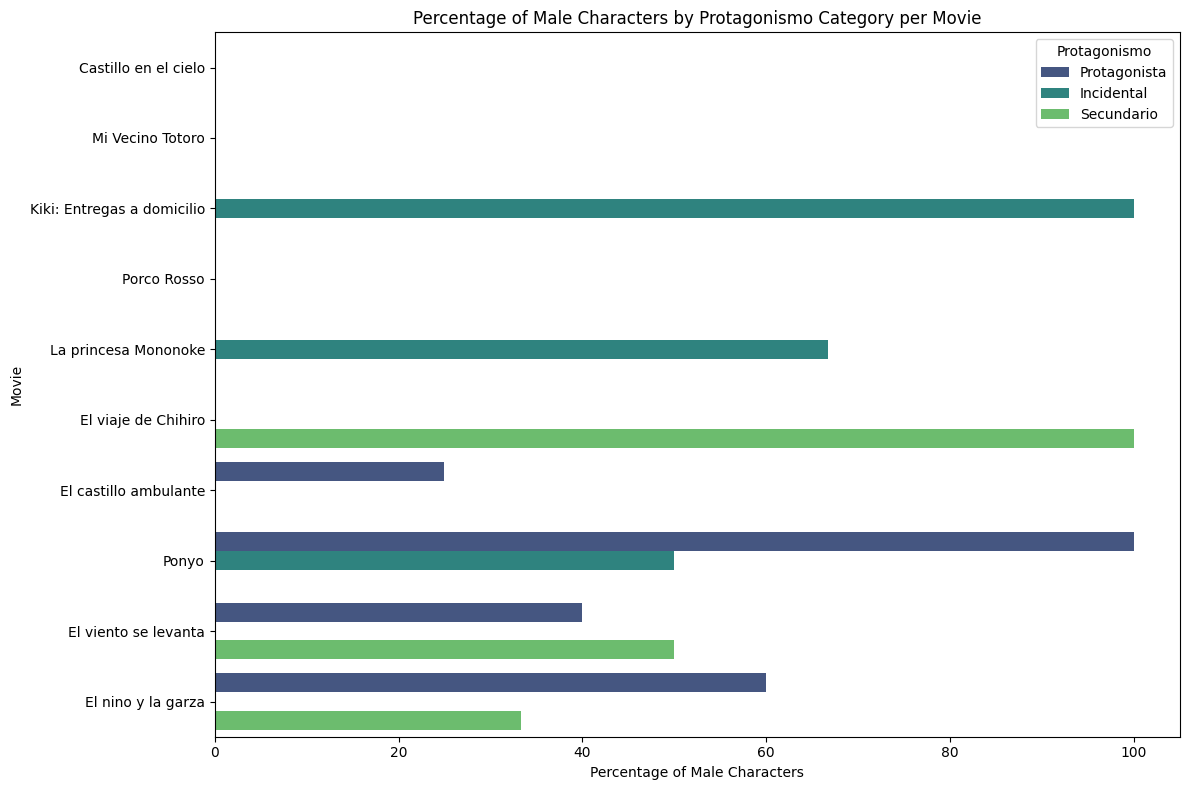

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=male_percentage_by_protagonismo_df, y='Pelicula', x='Percentage_Male_Characters', hue='Protagonismo', palette='viridis')
plt.xlabel('Percentage of Male Characters')
plt.ylabel('Movie')
plt.title('Percentage of Male Characters by Protagonismo Category per Movie')
plt.legend(title='Protagonismo')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   A new DataFrame, `male_percentage_by_protagonismo_df`, was successfully generated. This DataFrame quantifies the percentage of male characters for each 'Protagonismo' category ('Protagonista', 'Incidental', 'Secundario') within each movie.
*   For the movie 'Castillo en el cielo', the percentage of male characters was calculated as 0.0% across all 'Protagonismo' categories, suggesting a complete absence of male characters or characters in these categories for that film.
*   A grouped bar chart was successfully created, visualizing the calculated male percentages. This chart effectively displays the male character representation across different movies and 'Protagonismo' categories, allowing for clear visual comparisons.

### Insights or Next Steps
*   This analysis provides a granular view of male character representation, which can be extended to understand gender balance (by also analyzing female characters) across different roles and movies.
*   Investigate the movies with 0.0% male characters in all categories (e.g., 'Castillo en el cielo') to understand if they feature predominantly female casts or specific narrative choices.


# Task
Create a stacked bar chart to visualize the percentage of male characters for each 'Protagonismo' category ('Protagonista', 'Incidental', 'Secundario') within each movie. Each movie will have a single bar, and the segments within the bar will represent the percentage of male characters in each 'Protagonismo' category. Summarize the insights obtained from the stacked bar chart, detailing the distribution of male characters across different 'Protagonismo' categories in various movies.

## Generate Stacked Bar Chart for Male Characters by Protagonismo

### Subtask:
Create a stacked bar chart to visualize the percentage of male characters for each 'Protagonismo' category ('Protagonista', 'Incidental', 'Secundario') within each movie. Each movie will have a single bar, and the segments within the bar will represent the percentage of male characters in each 'Protagonismo' category.


**Reasoning**:
To generate the stacked bar chart as requested, I will pivot the `male_percentage_by_protagonismo_df` DataFrame, sort it, and then use `plot(kind='barh', stacked=True)` to create the visualization with all specified labels, title, legend, and axis limits.



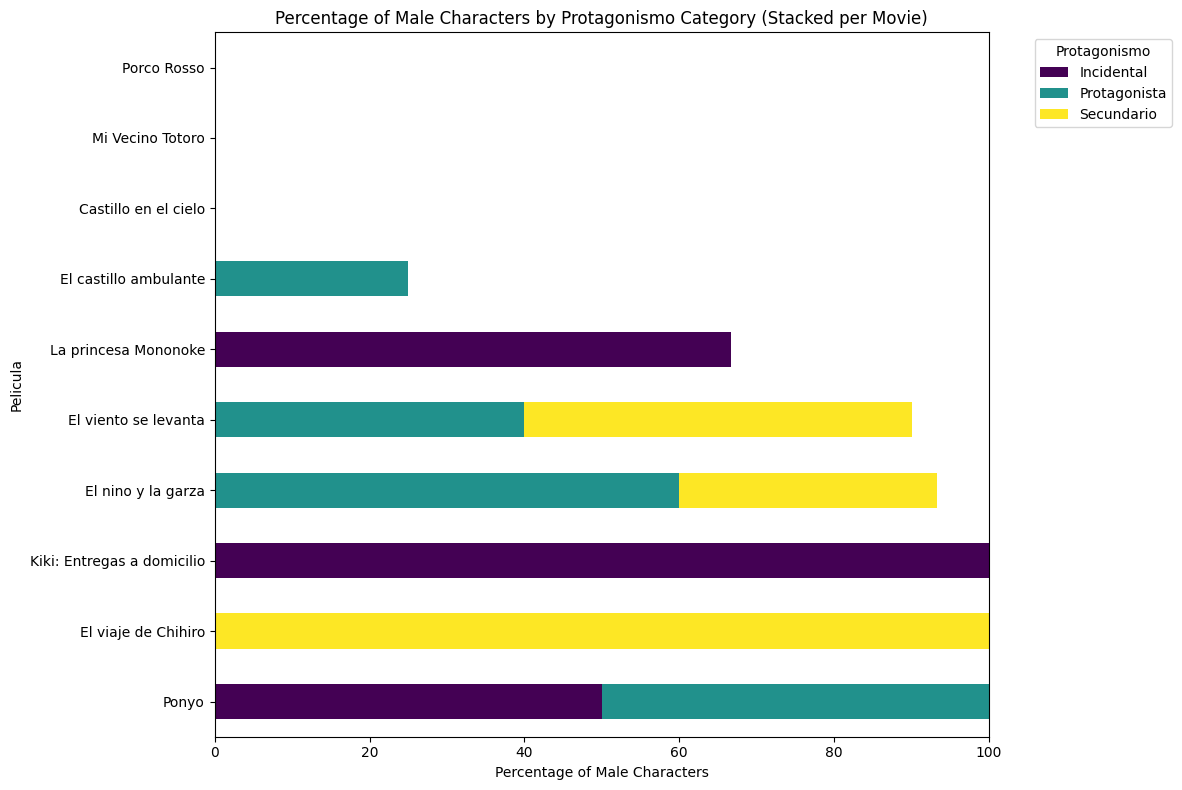

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the DataFrame to prepare for stacking
pivoted_df = male_percentage_by_protagonismo_df.pivot(index='Pelicula', columns='Protagonismo', values='Percentage_Male_Characters').fillna(0)

# Calculate the sum of male percentages across all 'Protagonismo' categories for each movie
pivoted_df['Total_Male_Percentage'] = pivoted_df.sum(axis=1)

# Sort the pivoted DataFrame by 'Total_Male_Percentage' in descending order and drop the temporary column
pivoted_df = pivoted_df.sort_values(by='Total_Male_Percentage', ascending=False).drop(columns=['Total_Male_Percentage'])

# Create the horizontal stacked bar chart
plt.figure(figsize=(12, 8)) # Set figure size for readability
pivoted_df.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='viridis', ax=plt.gca())

# Label the x-axis
plt.xlabel('Percentage of Male Characters')
# Label the y-axis
plt.ylabel('Pelicula')
# Set the title of the chart
plt.title('Percentage of Male Characters by Protagonismo Category (Stacked per Movie)')
# Set the x-axis limits from 0 to 100
plt.xlim(0, 100)
# Add a legend with the title 'Protagonismo' and position it outside the plot area
plt.legend(title='Protagonismo', bbox_to_anchor=(1.05, 1), loc='upper left')
# Ensure all elements fit within the figure and display the plot
plt.tight_layout()
plt.show()

### Summary of Stacked Bar Chart:

The stacked bar chart provides a visual representation of the distribution of male characters across different 'Protagonismo' categories (Protagonista, Incidental, Secundario) for each movie. Here are some key insights:

*   **Varying Male Representation:** The chart clearly shows a wide variation in the overall percentage of male characters per movie, as well as their distribution across protagonismo categories.
*   **Dominance in Specific Categories:** In some movies, male characters might be predominantly 'Protagonistas', while in others, they might be more prevalent as 'Secundarios' or 'Incidentales'. For example, movies like 'Ponyo' show a high percentage of male characters, with a significant portion as protagonists, while others like 'Castillo en el cielo' or 'Mi Vecino Totoro' show 0% male characters across all categories, indicating a predominantly female cast.
*   **Complementary to Grouped Bar Chart:** This stacked view complements the previously generated grouped bar chart by showing the combined total male character percentage for each movie, broken down by category, rather than comparing categories side-by-side.
*   **Insights on Character Archetypes:** The chart can highlight if certain movies tend to assign male characters more often to central roles (protagonistas) or supporting roles, which can be an indicator of storytelling choices and gender representation patterns.

### Next Steps:

*   Further analysis could involve comparing these male character distributions with female character distributions to get a complete picture of gender representation.
*   Investigate specific movies with extreme distributions (e.g., all male, all female, or highly skewed towards one category) to understand the narrative context and reasons behind these distributions.

## Summary:

### Data Analysis Key Findings
*   The stacked bar chart reveals significant variation in the overall percentage of male characters across different movies, as well as their distribution within 'Protagonismo' categories.
*   Male characters sometimes predominantly occupy 'Protagonista' roles in certain movies, while in others, they are more prevalent as 'Secundarios' or 'Incidentales'.
*   Some movies, such as 'Castillo en el cielo' or 'Mi Vecino Totoro', show 0% male characters across all categories, indicating a predominantly female cast.
*   The visualization effectively highlights whether male characters are more frequently assigned to central roles (Protagonistas) or supporting roles (Secundarios, Incidentales), providing insights into storytelling choices and gender representation patterns.

### Insights or Next Steps
*   Further analysis should compare male character distributions with female character distributions to obtain a comprehensive understanding of gender representation in the movies.
*   Investigate movies with highly skewed distributions (e.g., all male or all female characters, or a strong lean towards one 'Protagonismo' category) to understand the underlying narrative context and reasons for these particular distributions.
